In [1]:
import pandas as pd

digits_training_data = pd.read_csv('./train.csv')

# X is all the features I will be training the dataset on 
X = digits_training_data.copy()
# y is the prediction target
# pop label from the X and at the same time set the target
y = X.pop('label')

X.head()
# y.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

# use part of the data from training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

In [3]:
from tensorflow.keras.utils import to_categorical

picture_height, picture_width = 28, 28
number_type_count = 10

def reshape_digits_data(data):
    number_of_images = data.shape[0]
    shaped_data = data.values.reshape(number_of_images, picture_height, picture_width, 1) # 1 is grayscale
    return shaped_data

# to categorical pavercia reiksmes i vektoriu, jis reikalinas categorical_crossentropy.
def transform_digits_labels(labels):
    return to_categorical(labels, number_type_count)


In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# use part of the data from training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = reshape_digits_data(X_train)
y_train = transform_digits_labels(y_train)

X_valid = reshape_digits_data(X_valid)
y_valid = transform_digits_labels(y_valid)

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# max pooling surenka isryskina reiksmes
# convolution tai eina filtras ir grupuoja duomenis (+-, nevisai cia tikslu)
model = keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor=0.10),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),

    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# max pooling surenka isryskina reiksmes
# convolution tai eina filtras ir grupuoja duomenis (+-, nevisai cia tikslu)
model = keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor=0.10),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.10),

    layers.BatchNormalization(),
    layers.Convolution2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Convolution2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])

In [65]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# max pooling surenka isryskina reiksmes
# convolution tai eina filtras ir grupuoja duomenis (+-, nevisai cia tikslu)
model = keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    
    # Data Augmentation
    preprocessing.RandomContrast(factor=0.10),
    preprocessing.RandomFlip(mode='horizontal'),
    preprocessing.RandomRotation(factor=0.20),

    layers.BatchNormalization(),
    layers.Convolution2D(32,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),


    layers.BatchNormalization(),
    layers.Convolution2D(64,(3,3), activation='relu',padding = 'Same'),
    layers.Convolution2D(64,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    layers.BatchNormalization(),
    layers.Convolution2D(128,(3,3), activation='relu',padding = 'Same'),
    layers.Convolution2D(128,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    layers.BatchNormalization(),
    layers.Convolution2D(256,(3,3), activation='relu',padding = 'Same'),
    layers.Convolution2D(256,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])

In [77]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# max pooling surenka isryskina reiksmes
# convolution tai eina filtras ir grupuoja duomenis (+-, nevisai cia tikslu)
model = keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    
    # Data Augmentation
    preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
    preprocessing.RandomRotation(factor=0.10),

     layers.BatchNormalization(),
    layers.Convolution2D(32,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),


    layers.BatchNormalization(),
    layers.Convolution2D(64,(3,3), activation='relu',padding = 'Same'),
    layers.Convolution2D(64,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    layers.BatchNormalization(),
    layers.Convolution2D(128,(3,3), activation='relu',padding = 'Same'),
    layers.Convolution2D(128,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    layers.BatchNormalization(),
    layers.Convolution2D(256,(3,3), activation='relu',padding = 'Same'),
    layers.Convolution2D(256,(3,3), activation='relu',padding = 'Same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])

In [79]:
# min_delta is the minimum change in the monitored quantity to qualify as an improvement, which is used for early stopping.
# patience is the number of epochs with no improvement after which training will be stopped.

early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

optimizer = keras.optimizers.Adam(lr=0.0001)
# optimizer is the algorithm used to update the weights of the model.
# loss is the loss function to be minimized by the model.
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# batch size is the number of samples (rows) that will be processed at a time
# epochs is the number of times the entire dataset will be processed
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=16,
    epochs=1000,
    callbacks=[early_stopping],
)

Epoch 1/1000
1969/1969 [==============================] - 14s 6ms/step - loss: 0.0721 - accuracy: 0.9771 - val_loss: 0.0528 - val_accuracy: 0.9853
Epoch 2/1000
1969/1969 [==============================] - 14s 7ms/step - loss: 0.0671 - accuracy: 0.9790 - val_loss: 0.0429 - val_accuracy: 0.9862
Epoch 3/1000
1969/1969 [==============================] - 15s 8ms/step - loss: 0.0675 - accuracy: 0.9789 - val_loss: 0.0418 - val_accuracy: 0.9892
Epoch 4/1000
1969/1969 [==============================] - 15s 8ms/step - loss: 0.0685 - accuracy: 0.9789 - val_loss: 0.0324 - val_accuracy: 0.9912
Epoch 5/1000
1969/1969 [==============================] - 15s 8ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0332 - val_accuracy: 0.9902
Epoch 6/1000
1969/1969 [==============================] - 14s 7ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 7/1000
1969/1969 [==============================] - 14s 7ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0

Minimum Validation Loss: 0.0150


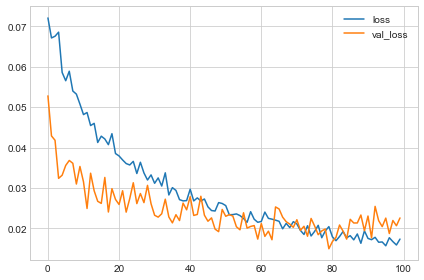

In [80]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [81]:
digits_training_data = pd.read_csv('./test.csv')
test_X = reshape_digits_data(digits_training_data.copy())

prediction = model.predict_classes(test_X)

submissions=pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)),
                         "Label": prediction})
submissions.to_csv("CNNAugnment3.csv", index=False, header=True)

C:\Users\laimo\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


SCORE 1: 0.98828

SCORE 2: 0.97592

SCORE 3: 0.99432